### 1. identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

import library

In [32]:
# import package
import numpy as np
import pandas as pd

# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# membaca dataset agar bisa di akses
data = pd.read_csv('insurance.csv') # membuat variabel daat yang berisi dataset

# melihat beberapa data awal
print('-------------------')
print('tampil beberapa data awal')
print('-------------------')
print(data.head())

# mengecek ukuran data
print('-------------------')
print('ukuran data')
print('-------------------')
print(data.shape)

# informasi tentang data
print('-------------------')
print('informasi tentang data')
print('-------------------')
print(data.info())


-------------------
tampil beberapa data awal
-------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
-------------------
ukuran data
-------------------
(1338, 7)
-------------------
informasi tentang data
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   ch

In [33]:
# Mengetahui deskripsi data
print('-------------------')
print(' deskripsi data')
print('-------------------')
print(data.describe()) # data describe hanya menampilkan data yang bernilai numerik

# Mengetahui jumlah data hilang
print('-------------------')
print('mengetahui data yang hilang')
print('-------------------')
print(data.isnull().sum())

-------------------
 deskripsi data
-------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
-------------------
mengetahui data yang hilang
-------------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


1.1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

dari dataset insurance.csv yang memiliki variabel : age, sex, bmi, childern, smoker, region, charges.

maka yang merupaakn variabel bebas adalah : sge, sex, bmi, childern, smoker dan region. 

yang merupakan variabel targer : charges.

1.2. Dari data yang ada karena tidak ada data yang bernilai null dan semua variabel independen berpengaruh terhadap variabel dependen makalangsung saja kita lakuakn encoding untuk data yang bertipe objek. 
Melakukan encoding data sex, smoker dan region
untuk variabel wregion menggunakan OneHotEncoding karena merupakan variabel non ordinal

In [34]:
# import library untuk melakukan encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding kolom 'sex' dan 'smoker'
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

# Mengubah kolom menjadi array 2D dan melakukan encoding dengan metode one-hot-encoder
region_encoded = oh.fit_transform(data['region'].values.reshape(-1, 1)).toarray()

# mengubah kolom 'region' dengan hasil one-hot encoding
# Misalnya, asumsikan data memiliki 3 kategori unik: northwest, southeast, southwest.
data['northwest'] = region_encoded[:, 0]
data['southeast'] = region_encoded[:, 1]
data['southwest'] = region_encoded[:, 2]
data.drop('region', axis=1, inplace=True)  # Menghapus kolom 'region' yang asli

# melakukan cek hasil encoding
data.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0


1.3. menampilkan hubungan variabel bebas dan variabel terikat

e:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


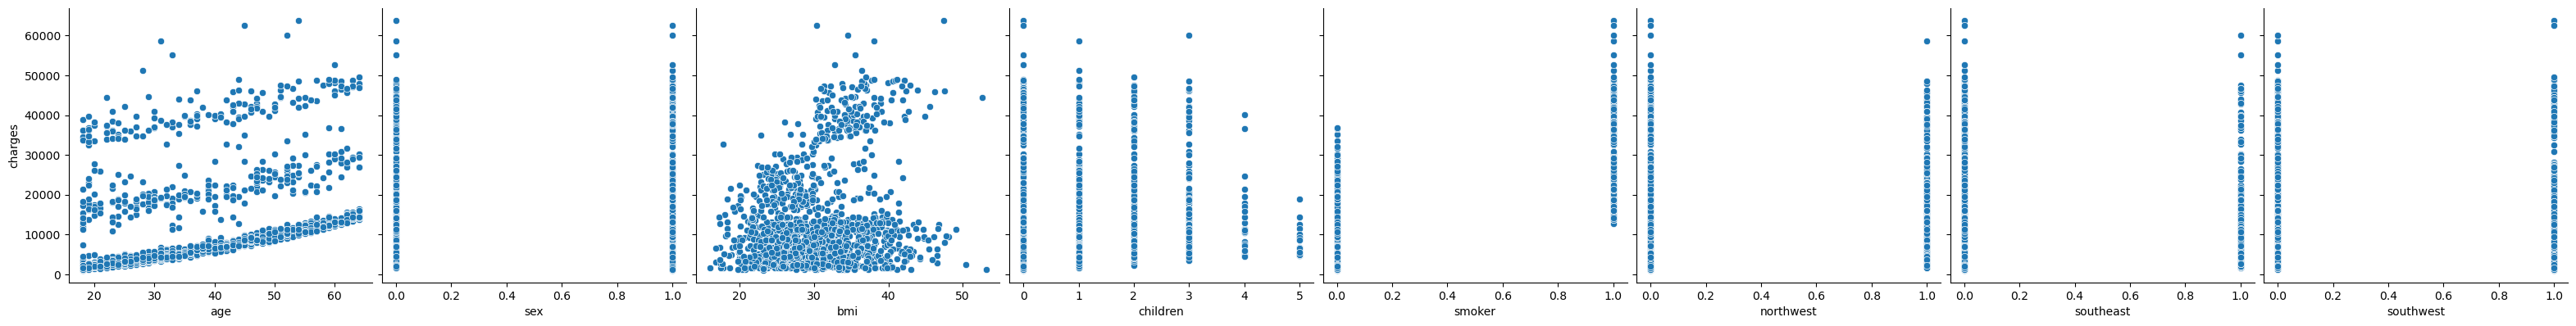

(1070, 8)
(1070,)


In [35]:
# visualisasi data  dengan pairplot
# Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker','northwest','southeast','southwest'],
            y_vars='charges',size=4, aspect=1, kind='scatter')

plt.show()

print(X_train.shape)
print(y_train.shape)


### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [40]:
# import library untuk melakukan split data
from sklearn.model_selection import train_test_split

# Tentukan fitur dan target
X = data.drop('charges', axis=1)
y = data['charges']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 1070
Jumlah data uji: 268


2.1. Melakukan scaling untuk data age

In [41]:
# Melakukan feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [42]:
# menampilkan hasil scaling

# Menampilkan beberapa baris pertama dari hasil scaling untuk X
print("Hasil scaling untuk X (beberapa baris pertama):")
print(X[:10])  # Menampilkan 5 baris pertama

# Menampilkan beberapa nilai pertama dari hasil scaling untuk y
print("\nHasil scaling untuk y (beberapa nilai pertama):")
print(y[:10])  # Menampilkan 5 nilai pertama

Hasil scaling untuk X (beberapa baris pertama):
   age  sex     bmi  children  smoker  northwest  southeast  southwest
0   19    0  27.900         0       1        0.0        0.0        0.0
1   18    1  33.770         1       0        0.0        0.0        1.0
2   28    1  33.000         3       0        0.0        0.0        1.0
3   33    1  22.705         0       0        0.0        1.0        0.0
4   32    1  28.880         0       0        0.0        1.0        0.0
5   31    0  25.740         0       0        0.0        0.0        1.0
6   46    0  33.440         1       0        0.0        0.0        1.0
7   37    0  27.740         3       0        0.0        1.0        0.0
8   37    1  29.830         2       0        1.0        0.0        0.0
9   60    0  25.840         0       0        0.0        1.0        0.0

Hasil scaling untuk y (beberapa nilai pertama):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7  

### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

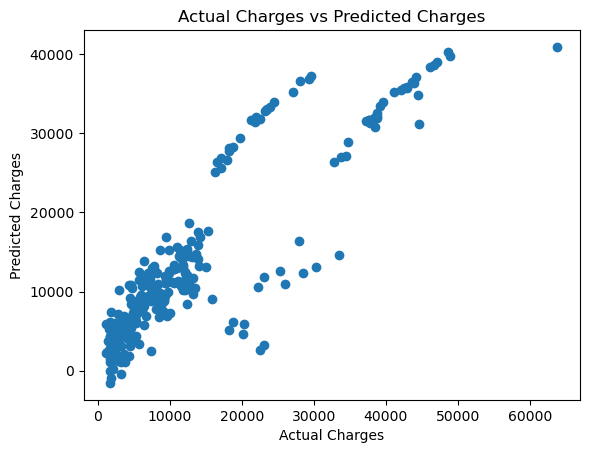

In [44]:
# Melatih model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Membuat prediksi
y_pred = regressor.predict(X_test)

# Menampilkan scatter plot antara y_test dan y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs Predicted Charges")
plt.show()

### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

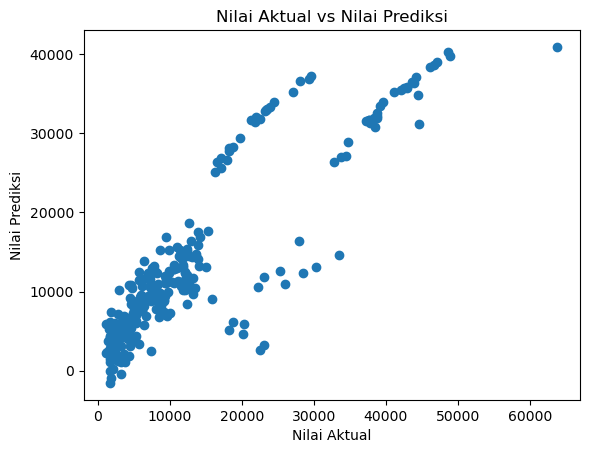

In [47]:
# melakukan prediksi pada data uji
import statsmodels.api as sm # library  untuk analisis statistik dan model statistik

# Menambahkan konstanta untuk memperhitungkan nilai tetap (intercept) dalam regresi
x_train_sm = sm.add_constant(X_train)

# membuat model regresi linear dengan menggunakan metode OLS
lr = sm.OLS(y_train, x_train_sm).fit()

# membuat prediksi atas hasil variabel target (dalam kasus ini, y_train) berdasarkan data input atau variabel prediktor (x_test)
x_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(x_test_sm)

plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Nilai Aktual vs Nilai Prediksi")
plt.show()

### 6.Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [48]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 206913.03994337126
MSE: 45335554358.80693
RMSE: 212921.47463045368
R-squared: -308.3673979520715


e:\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
